In [1]:
# AutoEncoders

# Importing the libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
training_set0=pd.read_csv('/my_data/train_matrix.csv',index_col=0)
test_set0=pd.read_csv('/my_data/test_matrix.csv',index_col=0)
nb_users,nb_business=training_set0.shape
training_set1=np.array(training_set0)
test_set1=np.array(test_set0)

In [3]:
# Converting the data into Torch tensors
training_set = torch.FloatTensor(training_set1)
test_set = torch.FloatTensor(test_set1)

# Creating the architecture of the Neural Network
class SAE(nn.Module):
    def __init__(self, ):
        super(SAE, self).__init__() #inheritage
        self.fc1 = nn.Linear(nb_business, 50)
        self.fc2 = nn.Linear(50, 10)
        self.fc3 = nn.Linear(10, 50)
        self.fc4 = nn.Linear(50, nb_business)
        self.activation = nn.Sigmoid()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

In [6]:
sae = SAE()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(sae.parameters(), lr = 0.1, weight_decay = 0.5)

# Training the SAE
nb_epoch = 20
delta_loss=[]
for epoch in range(1, nb_epoch + 1):
    train_loss = 0
    s = 0.   #float
    for id_user in range(nb_users):
        input = Variable(training_set[id_user]).unsqueeze(0)  #add an additional batch dimension at o column
        target = input.clone()   #similar to copy
        if torch.sum(target.data > 0) > 0: #to save space, just include users have rating.
            output = sae(input)
            target.require_grad = False #target will not change, save calculation
            output[target == 0] = 0
            loss = criterion(output, target)
            mean_corrector = nb_business/float(torch.sum(target.data > 0) + 1e-10)
            loss.backward()
            train_loss += np.sqrt(loss.data[0]*mean_corrector)
            s += 1.
            optimizer.step()
        if s%500==0:
            print(train_loss/s)
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))
    delta_loss.append(train_loss/s)

3.78353555557
3.78391474886
3.78310334926
3.76277818685
3.72256900938
3.6993970444
3.66408520866
3.64856598018
3.6241680144
3.59796485472
3.57483463316
3.54754854472
3.51813465887
3.49629593311
3.46783963902
3.44577761969
3.41856175244
3.3964154209
3.37198475138
3.35278150248
3.32547915272
3.30758829869
3.28635851574
3.26654465543
3.24896427009
3.22872804851
3.20980370081
3.19172154298
3.17477661861
3.15664533878
3.13992810602
3.12471085149
3.10995651668
3.09650800155
epoch: 1 loss: 3.09222155727
1.86166748139
2.11062422871
2.21927948942
2.2624288482
2.28524685654
2.31135229596
2.33794267424
2.34873553821
2.36043661584
2.36159783385
2.36077902924
2.36016443208
2.35725860727
2.35949322243
2.35742291101
2.35651154927
2.35006309728
2.34772665764
2.34790816357
2.34340143873
2.34238673393
2.3398254929
2.33609405933
2.3337061132
2.32824051479
2.32656133481
2.32269663012
2.32067557521
2.31710660944
2.31471257312
2.31060808374
2.3075921799
2.30508704278
2.30294193172
epoch: 2 loss: 2.302086294

1.19560026014
1.19457201429
1.1949094822
1.19233174018
1.19124895296
1.19184087226
1.18967554255
1.18929230244
1.19147843176
1.1898765873
1.18968461548
1.18967462569
1.18837118043
1.18653998339
1.18661061263
1.18463896534
1.18498441637
1.18380836558
1.18482969463
1.18406831316
1.18549285391
epoch: 17 loss: 1.18500784275
1.15245349217
1.13875320093
1.12576433936
1.13244598207
1.13065835954
1.13186027235
1.13980687209
1.14253146069
1.1470340627
1.14977021195
1.14973617654
1.14827237532
1.14759098612
1.14638750745
1.14902164611
1.15095362264
1.14893894645
1.1474753928
1.14991487554
1.15073271608
1.15120058648
1.15239502435
1.15223937679
1.15255343665
1.15155544544
1.15202516233
1.15125788702
1.15244200829
1.15155603191
1.15173880697
1.15050363287
1.15158279946
1.15104298443
1.15196116022
epoch: 18 loss: 1.15181968299
1.3046650976
1.23919087736
1.19949308719
1.1939921323
1.18560246047
1.17682345462
1.17170362818
1.16997283984
1.16923884676
1.16693146042
1.16411130151
1.16045804046
1.157429

In [10]:
# Testing the SAE
test_loss = 0
s = 0.
pred=np.zeros(training_set.shape)
for id_user in range(nb_users):
    input = Variable(training_set[id_user]).unsqueeze(0)  #use the movies a user has watched(training set)
    target = Variable(test_set[id_user])
    output = sae(input)
    pred[id_user]=output.data.numpy()
    if torch.sum(target.data > 0) > 0:
        
        
        target.require_grad = False
        output[target == 0] = 0
        loss = criterion(output, target)
        mean_corrector = nb_business/float(torch.sum(target.data > 0) + 1e-10)
        test_loss += np.sqrt(loss.data[0]*mean_corrector)
        s += 1.
print('test loss: '+str(test_loss/s))

test loss: 1.122932474


In [ ]:
pd.DataFrame(pred).to_csv('aePred.csv')
print(pred)

[[ 1.93607199  3.81176329  3.47515154 ...,  1.70368052  0.28398669
   3.18119144]
 [ 1.93990052  3.80489874  3.47582579 ...,  1.70669496  0.28351051
   3.18157053]
 [ 1.96355093  3.72779083  3.46693373 ...,  1.72495902  0.27760339
   3.16983604]
 ..., 
 [ 1.92783189  3.83294702  3.47590256 ...,  1.69737697  0.28556412
   3.18288636]
 [ 1.93267083  3.82506537  3.47710657 ...,  1.70117521  0.28502852
   3.18370032]
 [ 1.94327962  3.80179262  3.47747183 ...,  1.70942903  0.28333664
   3.18306994]]


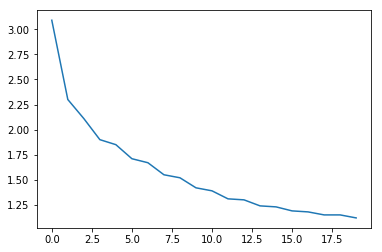

In [17]:

ex = range(len(delta_loss))
plt.figure(1)
plt.plot(ex,delta_loss)
plt.show()